### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv('Yellow_tripdata_2020-01.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

### Preparing Data 

In [6]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


### Extracting Data

In [10]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [11]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [12]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [13]:
(65441/len(df))*100

1.021716132126611

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [16]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [17]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(3007861, 5)

In [20]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [21]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [22]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [23]:
df.shape

(2780283, 5)

In [24]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [25]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [26]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [27]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [28]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x148a70b2090>,
 'caps': [<matplotlib.lines.Line2D at 0x148a70b3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x148be98e050>],
 'medians': [<matplotlib.lines.Line2D at 0x148a70c9010>],
 'fliers': [<matplotlib.lines.Line2D at 0x148a70c9bd0>],
 'means': []}

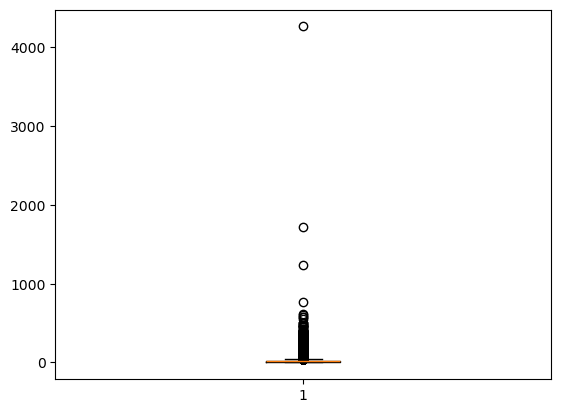

In [29]:
plt.boxplot(df['fare_amount'])

It shows data consist outliers. so we use IOR to remove outliers

In [30]:
for col in ['fare_amount','trip_distance','duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    df=df[(df[col]>=lower_bound)& (df[col]<=upper_bound)]

In [31]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


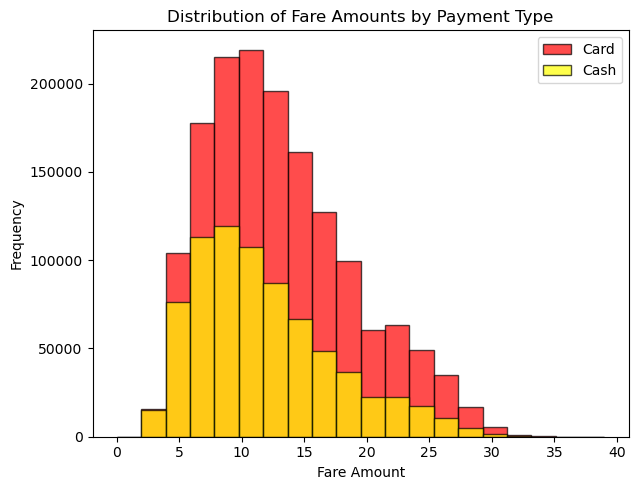

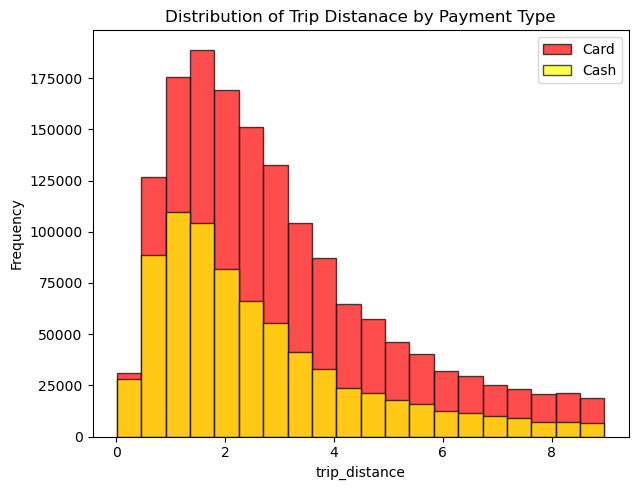

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], 
         bins=20, edgecolor='k', color='red', alpha=0.7, label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], 
         bins=20, edgecolor='k', color='yellow', alpha=0.7, label='Cash')
plt.legend()
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amounts by Payment Type')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], 
         bins=20, edgecolor='k', color='red', alpha=0.7, label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], 
         bins=20, edgecolor='k', color='yellow', alpha=0.7, label='Cash')
plt.legend()
plt.xlabel('trip_distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distanace by Payment Type')
plt.tight_layout()
plt.show()


In [33]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

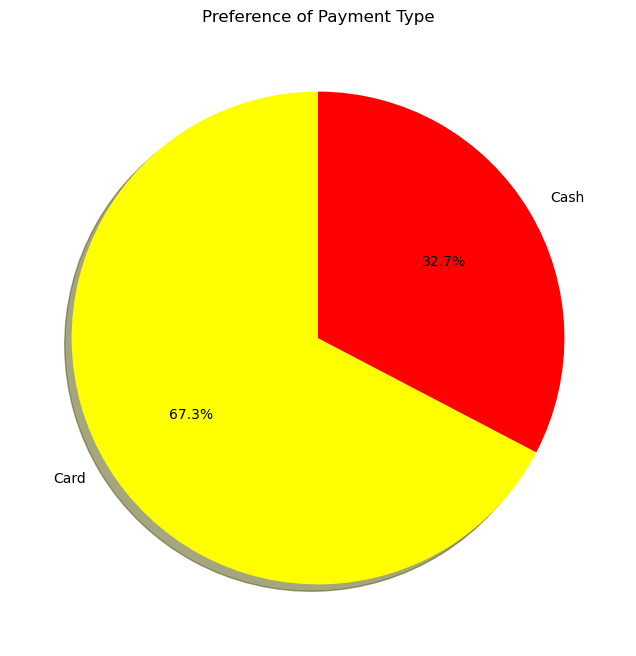

In [34]:
plt.figure(figsize=(8, 8))
plt.title('Preference of Payment Type')
plt.pie(
    df['payment_type'].value_counts(normalize=True),
    labels=df['payment_type'].value_counts().index,
    startangle=90,
    shadow=True,
    autopct='%1.1f%%',
    colors=['yellow', 'red']
)
plt.show()

In [35]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [36]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [37]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [38]:
df1=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df1['payment_type']=['Card','Cash']
df1.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df1.iloc[1,1:]=passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['orange', 'yellow', 'pink', 'grey', 'blue'],
    ax=ax
)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(
        x + width / 2,
        y + height / 2,
        '{:.0f}%'.format(width),
        horizontalalignment='center',
        verticalalignment='center'  
    )

plt.show()

#### Null Hypothesis:There is no difference in average fare between customers who use credit card and customers who use cash.
#### Alternative Hypothesis : There is difference in average fare between customers who use credit card and customers who use cash. 

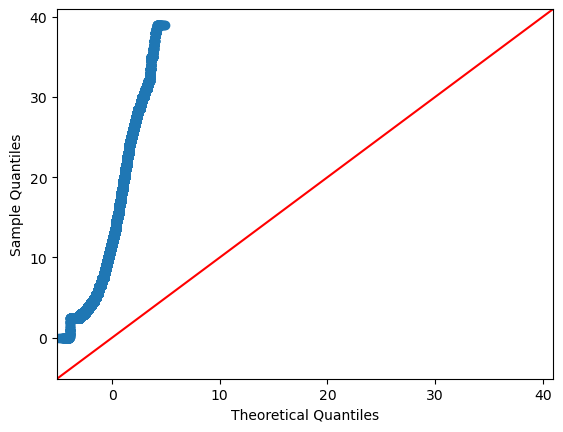

In [39]:
sm.qqplot(df['fare_amount'], line='45')
plt.show()

In [40]:
Card_sample=df[df['payment_type']=='Card']['fare_amount']
Cash_sample=df[df['payment_type']=='Cash']['fare_amount']

In [41]:
import scipy.stats as st

t_stats, p_value = st.ttest_ind(a=Card_sample, b=Cash_sample, equal_var=False)
print('T-statistic:', t_stats, 'P-value:', p_value)

T-statistic: 169.2111527245052 P-value: 0.0
